<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/blob/main/Kaggle_Challenge_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KAGGLE CHALLENGE** : ( TEAM - 5 )


---
**Team Members** :

1.	Varun Pothu – 21080409 – vp22acb@herts.ac.uk
2.	Balaji Pothuganti – 22023213 – bp22abc@herts.ac.uk
3.	Nikhitha Manika – 22007583 – nm22acl@herts.ac.uk
4.	Deepika Cherupally – 22031854 – dc22abs@herts.ac.uk
5.	Dhana Srivalli Golukonda – 21087223 – dg22abc@herts.ac.uk
6.	Bharath Kumar Savarapu – 22018647 – bs22abu@herts.ac.uk
7.	Anish Teku – 22013306 – at22aej@herts.ac.uk

---



---
> **AIM OF THE PROJECT**
---
> The aim of this assignment is to develop a statistical or machine learning model to predict whether passengers on the Spaceship Titanic were transported to an alternate dimension during a collision with a spacetime anomaly. The model will be trained on a provided dataset and evaluated through a Kaggle Challenge. The objective is to apply and demonstrate knowledge of research methods in data science, including data exploration, model development, and critical analysis of results.


---
> **PROBLEM STATEMENT**

---
> In the year 2912, the Spaceship Titanic, carrying almost 13,000 passengers to newly habitable exoplanets, collided with a spacetime anomaly, causing nearly half of the passengers to be transported to an alternate dimension. Using personal records from the ship's damaged computer system, the task is to predict which passengers were transported to the alternate dimension.

* This prediction will assist rescue crews in retrieving the lost passengers and changing history.

* The challenge involves exploring and visualizing the data, building and customizing a predictive model, and presenting the findings collaboratively as a team.


---
> **DATASET DESCRIPTION**
---

The dataset contains personal records of passengers from the Spaceship Titanic to predict if they were transported to an alternate dimension. The training set (train.csv) includes 8,700 records, and the test set (test.csv) includes 4,300 records. Each record features unique passenger IDs, home planets, cryo-sleep status, cabin details, destination, age, VIP status, and spending amounts on various amenities. The target variable, Transported, indicates if a passenger was transported to another dimension. The sample submission file (sample_submission.csv) shows the required prediction format.

```
DATASET LINK:
https://www.kaggle.com/competitions/spaceship-titanic
```
[LINK FOR DATASET](https://www.kaggle.com/competitions/spaceship-titanic)

---

## Importing Libraries

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [34]:
# Reading th Train Data
data_train = "https://raw.githubusercontent.com/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/main/train.csv"
df_train = pd.read_csv(data_train)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [35]:
# Display information about the dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [36]:
# Train data description
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [37]:
# Reading the Test Data
data_test = "https://raw.githubusercontent.com/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/main/test.csv"
df_test = pd.read_csv(data_test)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [38]:
# Display information about the dataset
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


In [39]:
# Test data description
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


## EDA (Exploratory data analysis)

Visualize the distribution of Dataset features

Target Variable Distribution

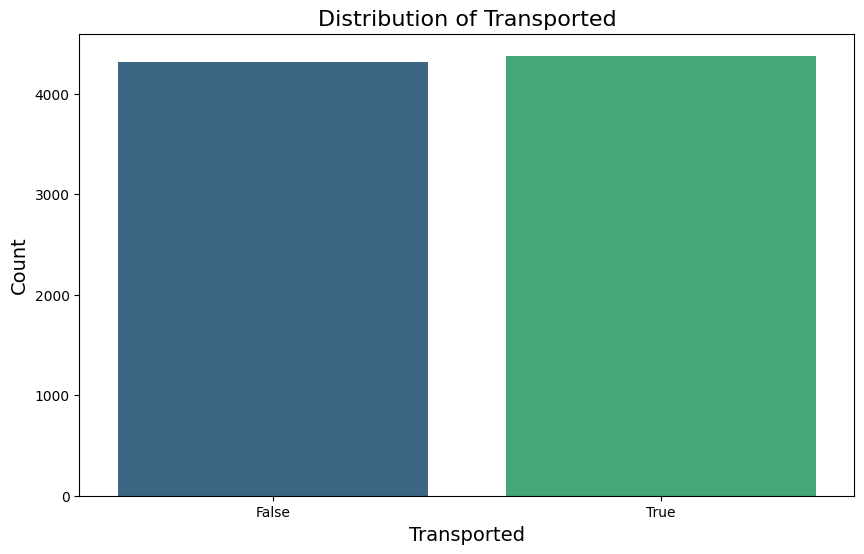

In [40]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Transported', data=df_train, palette='viridis')
plt.title('Distribution of Transported', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Age Distribution

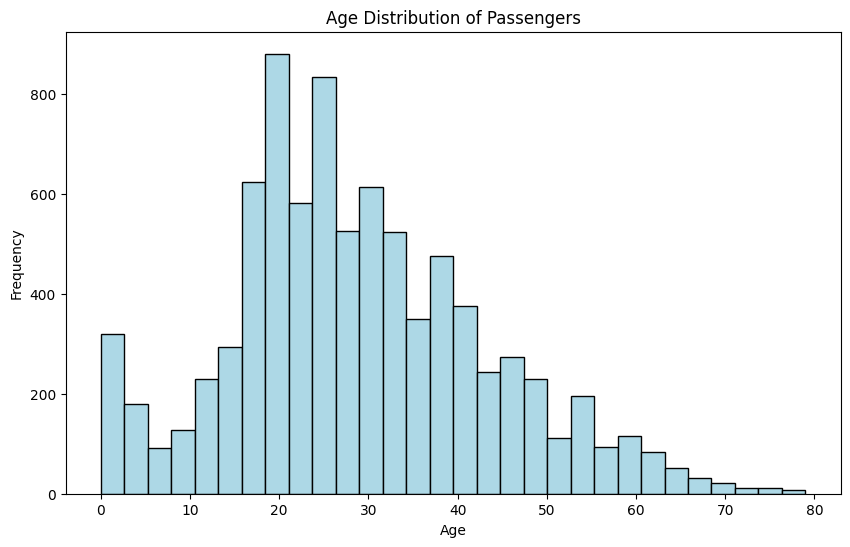

In [41]:
# Age Distribution of Passengers
plt.figure(figsize=(10, 6))
df_train['Age'].dropna().plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

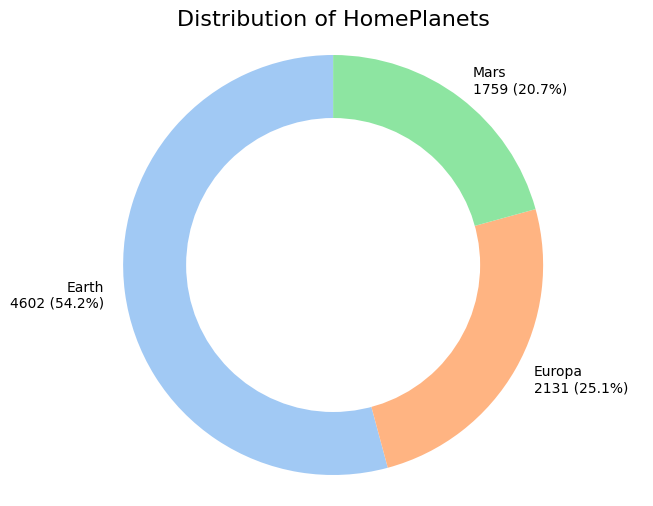

In [42]:
# Calculate value counts of HomePlanet
home_planet_counts = df_train['HomePlanet'].value_counts()

# Calculate percentages
percentages = home_planet_counts.values / home_planet_counts.sum() * 100

# Create labels with both count and percentage
labels = [f'{home_planet_counts.index[i]}\n{home_planet_counts.values[i]} ({percentages[i]:.1f}%)' for i in range(len(home_planet_counts))]

# Create a pie chart using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(home_planet_counts.values, labels=labels, startangle=90, colors=sns.color_palette('pastel'))

# Draw a white circle at the center to create the donut hole effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of HomePlanets', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


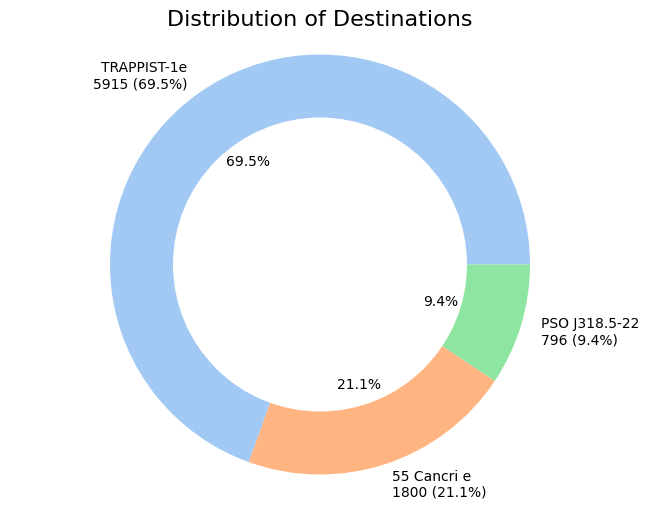

In [43]:
# Defined and contains the 'Destination' column
destination_counts = df_train['Destination'].value_counts()

# Create labels with percentage
percentages = destination_counts.values / destination_counts.sum() * 100
labels = [f'{destination_counts.index[i]}\n{destination_counts.values[i]} ({percentages[i]:.1f}%)' for i in range(len(destination_counts))]

# Create a pie chart using Matplotlib and Seaborn colors
plt.figure(figsize=(8, 6))
plt.pie(destination_counts.values, labels=labels, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('pastel'))

# Draw a white circle at the center to create the donut hole effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Destinations', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


Pairplot Distribution with Target Variable

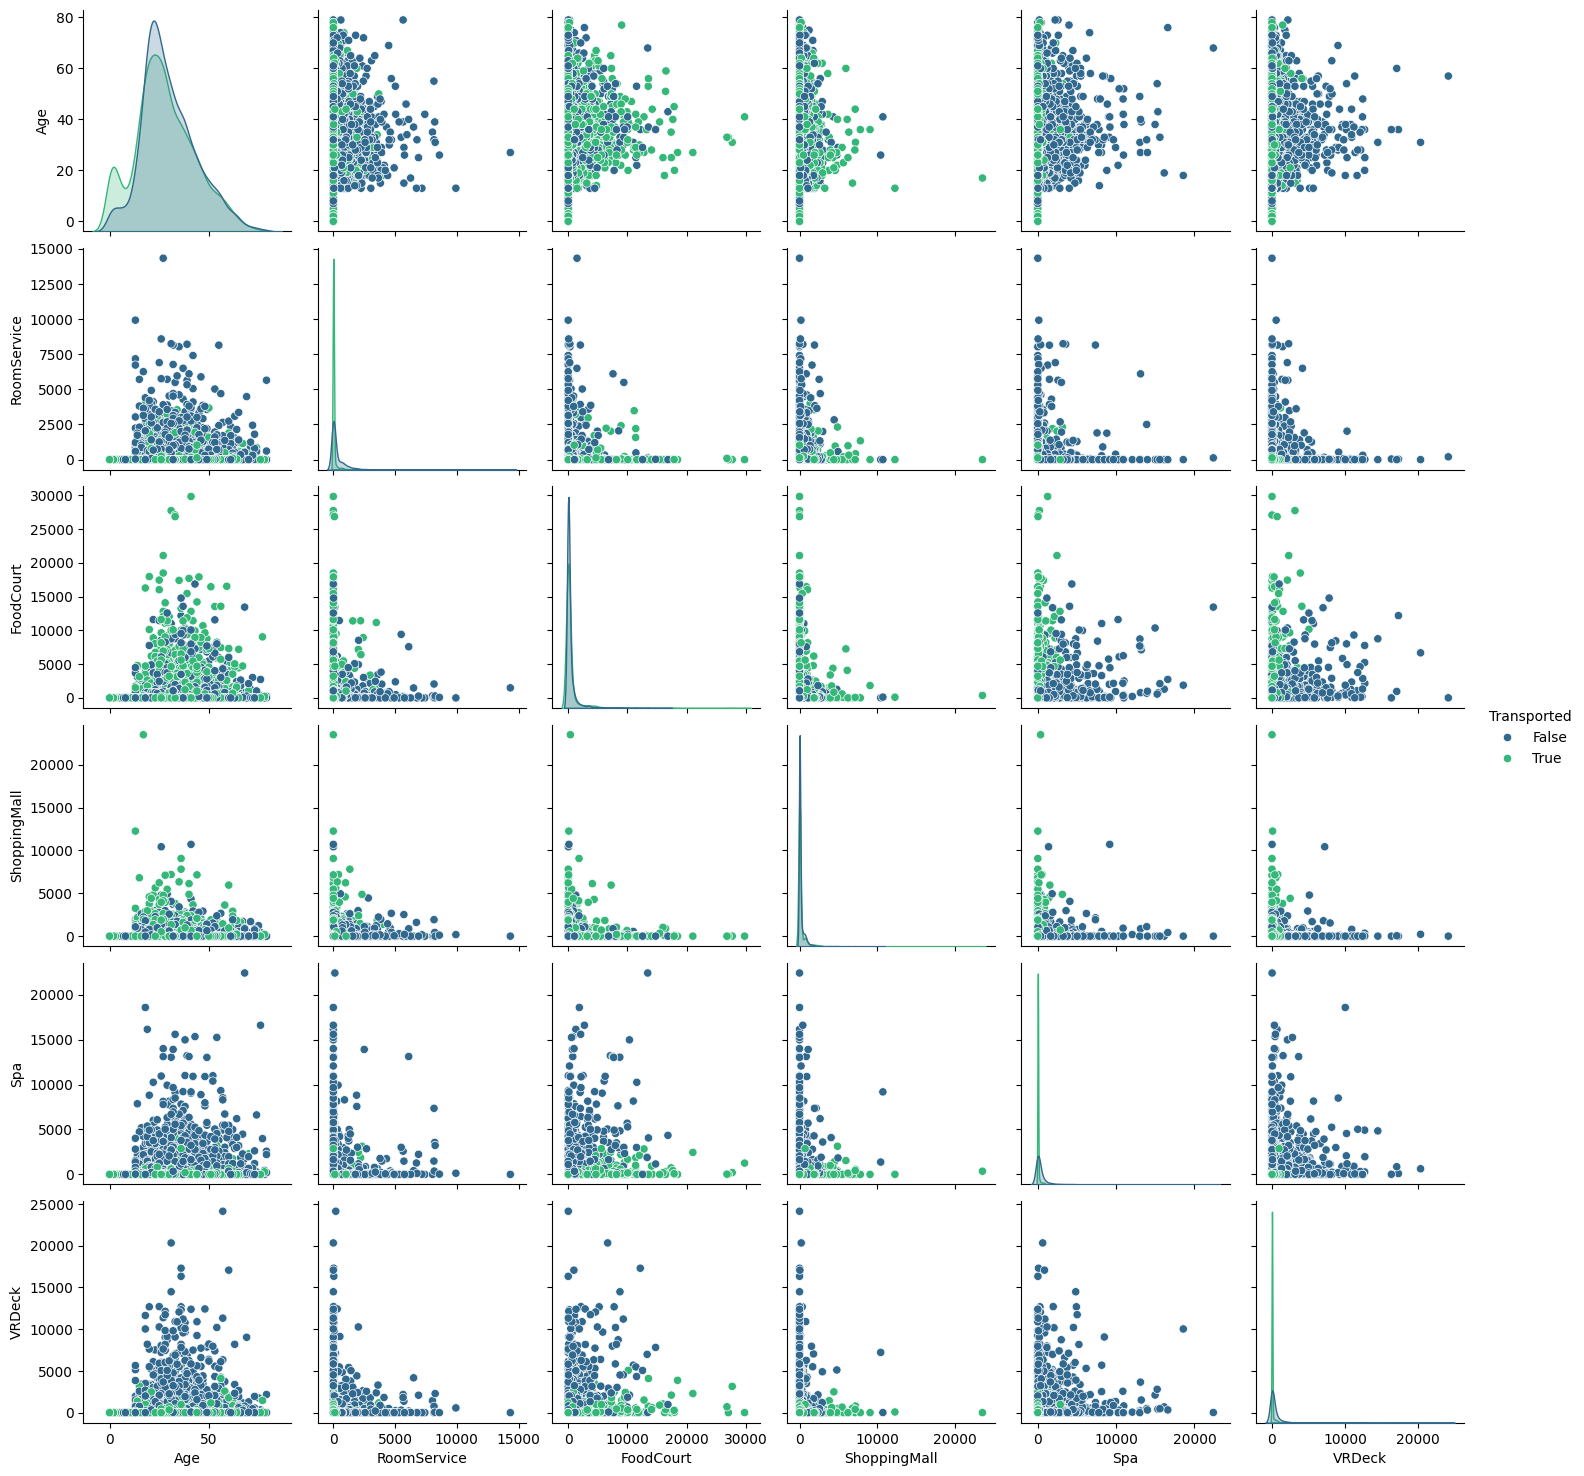

In [44]:
# Pairplot of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.pairplot(df_train[numerical_features + ['Transported']], hue='Transported', palette='viridis')
plt.show()


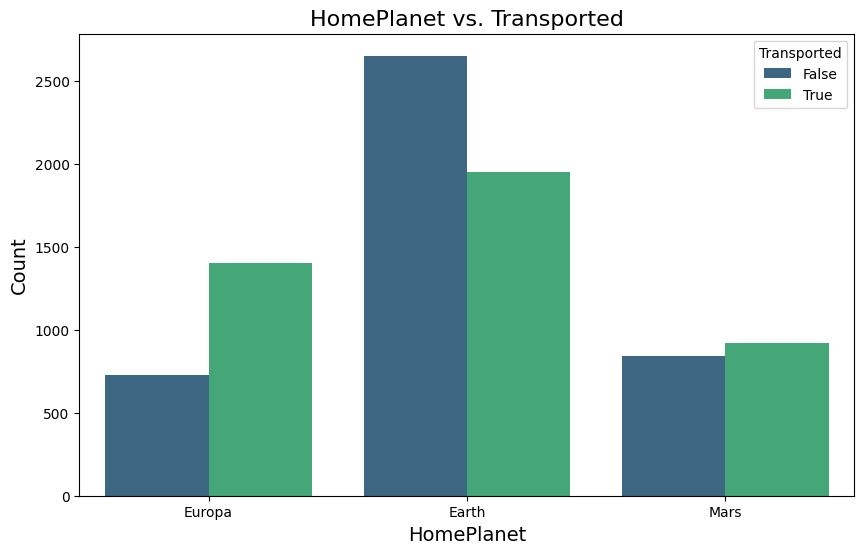

In [45]:
# HomePlanet vs. Transported
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', hue='Transported', data=df_train, palette='viridis')
plt.title('HomePlanet vs. Transported', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


HomePlanet VS Transported

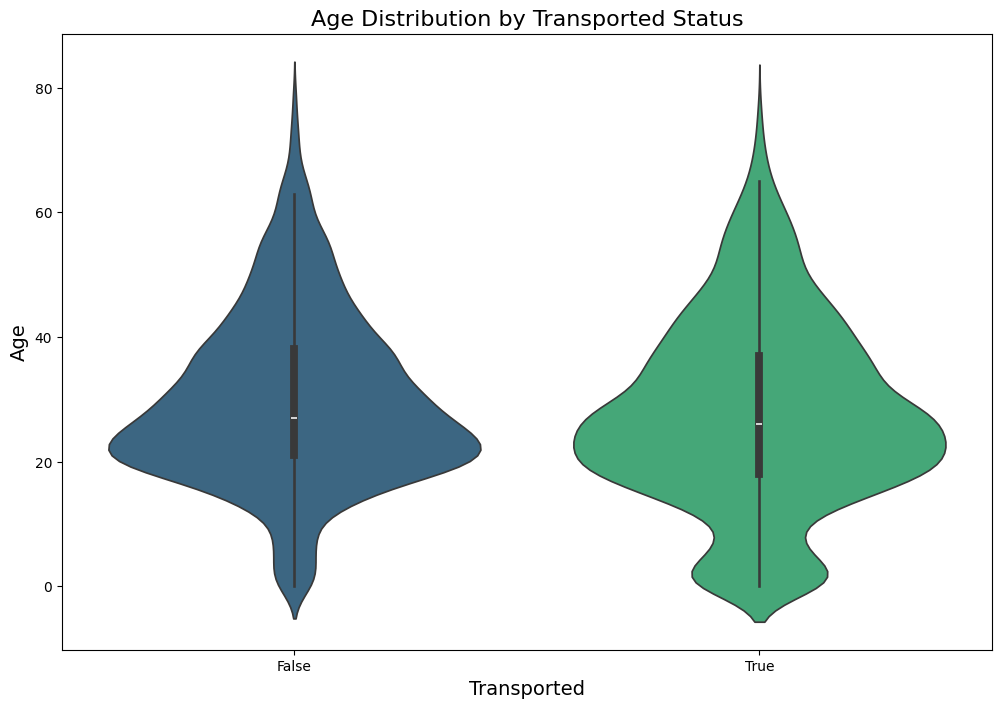

In [46]:
# Violin plot for Age by Transported
plt.figure(figsize=(12, 8))
sns.violinplot(x='Transported', y='Age', data=df_train, palette='viridis')
plt.title('Age Distribution by Transported Status', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()


Correlation Analysis

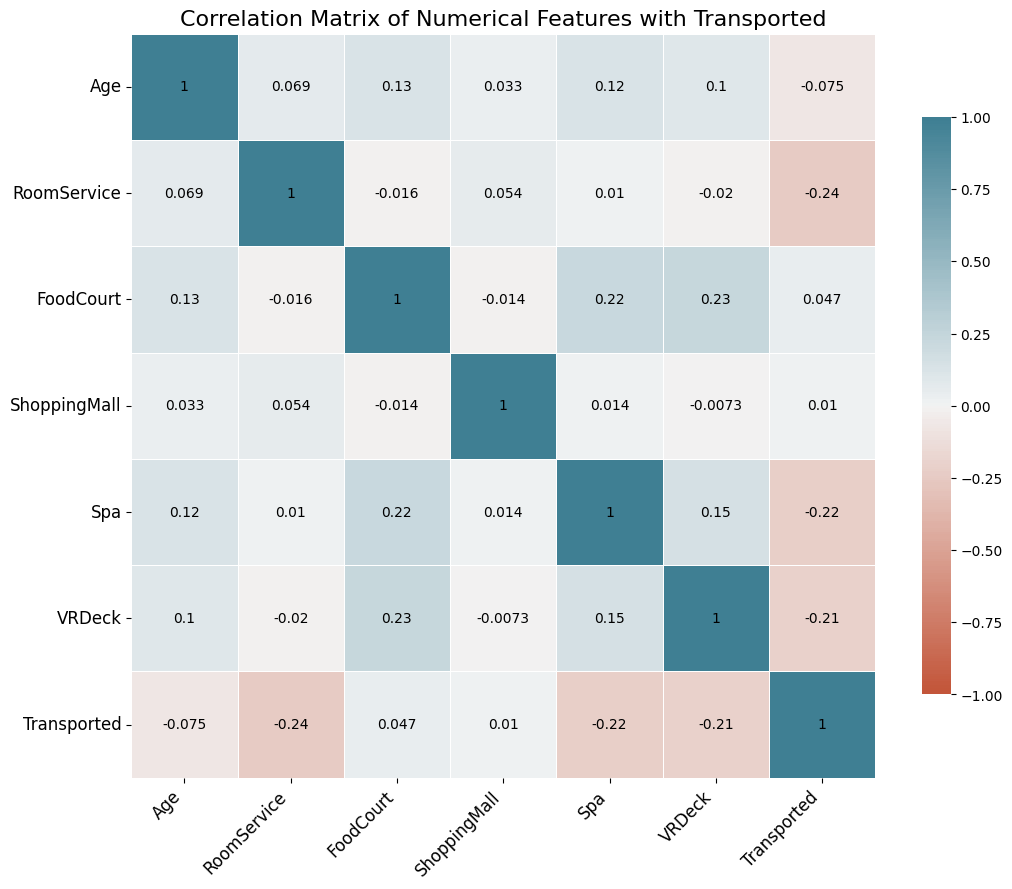

In [47]:
# Select only numeric columns and add the target variable 'Transported'
num_features_with_target = numerical_features + ['Transported']
numeric_df = df_train[num_features_with_target]

# Compute correlation matrix
corr = numeric_df.corr()

# Plotting the heatmap with similar style
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10, "color": "black"}
)

# Customize labels and rotation
plt.title('Correlation Matrix of Numerical Features with Transported', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.show()


## Data Pre-Processing

Checking the Missing Values

In [48]:
# Calculate the number of missing values
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

# Combine the results into a single DataFrame
missing_values = pd.DataFrame({
    'Train': missing_train,
    'Test': missing_test
})

# Display the DataFrame
missing_values

,Train,Test
Age,179,91.0
Cabin,199,100.0
CryoSleep,217,93.0
Destination,182,92.0
FoodCourt,183,106.0
HomePlanet,201,87.0
Name,200,94.0
PassengerId,0,0.0
RoomService,181,82.0
ShoppingMall,208,98.0


Filling Missing values using the 'SimpleImpute'


*   **For Numerical Features** - Using the median to fill in missing values as median is robust to outliers and can provide a central tendency of the data.
*   **For Categorical Features** - Using the most frequent value to fill in missing values. This is useful when a missing value might represent the most common category, and it helps maintain the distribution of the data.



In [49]:
# Fill missing values for numerical features with median
num_imputer = SimpleImputer(strategy='median')
df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = num_imputer.fit_transform(df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
df_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = num_imputer.transform(df_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Fill missing values for categorical features with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = cat_imputer.fit_transform(df_train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])
df_test[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = cat_imputer.transform(df_test[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])


Re-Checking the Handled Missing Values

In [50]:
# Calculate the number of missing values
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

# Combine the results into a single DataFrame
missing_values = pd.DataFrame({
    'Train': missing_train,
    'Test': missing_test
})

# Display the DataFrame
missing_values

,Train,Test
Age,0,0.0
Cabin,0,0.0
CryoSleep,0,0.0
Destination,0,0.0
FoodCourt,0,0.0
HomePlanet,0,0.0
Name,200,94.0
PassengerId,0,0.0
RoomService,0,0.0
ShoppingMall,0,0.0


## Feature Engineering

Split the Cabin feature into Deck, Num, and Side.
*   Splitting the Cabin feature helps in better feature representation and allows the model to capture spatial relationships.



In [51]:
df_train[['Deck', 'CabinNum', 'Side']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['Deck', 'CabinNum', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)


Convert CryoSleep and VIP to boolean.

*   The CryoSleep and VIP features indicate whether a passenger opted for cryosleep or paid for VIP service, respectively. These features are originally represented as True, False, or NaN.

*   Converting these features to boolean makes them more suitable for machine learning models, as it ensures a consistent binary representation.



In [52]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype(bool)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(bool)
df_train['VIP'] = df_train['VIP'].astype(bool)
df_test['VIP'] = df_test['VIP'].astype(bool)


**Encode Categorical Features** -
Convert categorical features into numerical using LabelEncoder.

In [53]:
le = LabelEncoder()
for col in ['HomePlanet', 'Destination', 'Deck', 'Side']:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])


**Feature Scaling** -
Scale numerical features.

In [54]:
scaler = StandardScaler()
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum']
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.transform(df_test[num_features])


**Prepare Target Variable** -
Separate the target variable Transported from the training data.

In [55]:
X = df_train.drop(columns=['Transported', 'Name', 'PassengerId'])
y = df_train['Transported']
X_test = df_test.drop(columns=['Name', 'PassengerId'])


**Train-Test Split** -
Split the training data for validation.

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Checking Preprocessed Data

In [57]:
# Assuming X_train, y_train, and X_test are DataFrames
print("X_train:")
X_train.head()

X_train:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side
2333,0,False,2,-0.055109,False,-0.333105,-0.246559,-0.283579,0.312227,-0.263003,6,0.257877,1
2589,0,False,2,-0.822163,False,-0.333105,0.467861,-0.231737,-0.270626,-0.263003,5,-0.056142,0
8302,1,True,0,-0.055109,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,2,-0.541982,1
8177,2,False,2,-0.612966,False,-0.333105,-0.279773,0.199721,0.596546,-0.263003,5,2.363185,0
500,1,True,0,0.502749,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,2,-1.156195,0


In [58]:
print("y_train:")
y_train.head()

y_train:


2333    False
2589    False
8302     True
8177     True
500      True
Name: Transported, dtype: bool

In [59]:
print("X_test:")
X_test.head()

X_test:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side
0,0,True,2,-0.124841,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,6,-1.185819,1
1,0,False,2,-0.682698,False,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,5,-1.183844,1
2,1,True,0,0.154088,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,2,-1.191744,1
3,1,False,2,0.642213,False,-0.333105,3.887680,-0.283579,-0.109808,0.252842,2,-1.189769,1
4,0,False,2,-0.612966,False,-0.317964,-0.281027,0.778343,-0.270626,-0.263003,5,-1.181869,1


## Data Modelling

**Importing The Libraries for the Modelleing**

In [60]:
# Library
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Gradient Boosting Classifier**

In [61]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_gb = gb_classifier.predict(X_val)

# Calculate accuracy
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)

# Print accuracy
accuracy_gb_output = f'Accuracy: {accuracy_gb:.2f}'

# Print accuracy
print(f'Accuracy: {accuracy_gb:.2f}')

# Generate classification report
classification_report_gb_output = classification_report(y_val, y_val_pred_gb)
print('Classification Report:')
print(classification_report_gb_output)

# Generate confusion matrix
confusion_matrix_gb_output = confusion_matrix(y_val, y_val_pred_gb)
print('Confusion Matrix:')
print(confusion_matrix_gb_output)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.74      0.78       861
        True       0.77      0.85      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.80      0.79      1739

Confusion Matrix:
[[639 222]
 [134 744]]


**Logistic Regression**

In [62]:
# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_logistic = logistic_classifier.predict(X_val)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)

# Print accuracy
print(f'Accuracy: {accuracy_logistic:.2f}')

# Generate classification report
classification_report_logistic_output = classification_report(y_val, y_val_pred_logistic)
print('Classification Report:')
print(classification_report_logistic_output)

# Generate confusion matrix
confusion_matrix_logistic_output = confusion_matrix(y_val, y_val_pred_logistic)
print('Confusion Matrix:')
print(confusion_matrix_logistic_output)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.73      0.76       861
        True       0.75      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix:
[[628 233]
 [165 713]]


**Support Vector Machine (SVM) Classification**

In [63]:
# Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_svm = svm_classifier.predict(X_val)

# Calculate accuracy
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

# Print accuracy
accuracy_svm_output = f'Accuracy: {accuracy_svm:.2f}'

# Print accuracy
print(f'Accuracy: {accuracy_svm:.2f}')

# Generate classification report
classification_report_svm_output = classification_report(y_val, y_val_pred_svm)
print('Classification Report:')
print(classification_report_svm_output)

# Generate confusion matrix
confusion_matrix_svm_output = confusion_matrix(y_val, y_val_pred_svm)
print('Confusion Matrix:')
print(confusion_matrix_svm_output)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.73      0.76       861
        True       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix:
[[632 229]
 [168 710]]


**Random Forest Classifier**

In [64]:
X = df_train.drop(['Transported', 'PassengerId', 'Name'], axis=1)
y = df_train['Transported']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest Classifier
RMF_model = RandomForestClassifier()

# Train the classifier
RMF_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = RMF_model.predict(X_val)

# Print accuracy
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}
grid_search = GridSearchCV(RMF_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best Params: {grid_search.best_params_}')

# Evaluation
y_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.7981598619896493
Best Params: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

       False       0.78      0.81      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



**DECISION TREE CLASSIFIER**

In [65]:
# Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dt = decision_tree_classifier.predict(X_val)

# Calculate accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

# Print accuracy
accuracy_dt_output = f'Accuracy: {accuracy_dt:.2f}'
print(accuracy_dt_output)

# Generate classification report
classification_report_dt_output = classification_report(y_val, y_val_pred_dt)
print('Classification Report:')
print(classification_report_dt_output)

# Generate confusion matrix
confusion_matrix_dt_output = confusion_matrix(y_val, y_val_pred_dt)
print('Confusion Matrix:')
print(confusion_matrix_dt_output)


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.71      0.73       861
        True       0.73      0.75      0.74       878

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739

Confusion Matrix:
[[614 247]
 [217 661]]


**GAUSSIAN NB**

In [66]:
# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_gnb = gnb_classifier.predict(X_val)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_val, y_val_pred_gnb)
print(f'Accuracy: {accuracy_gnb:.2f}')

# Generate classification report
classification_report_gnb_output = classification_report(y_val, y_val_pred_gnb)
print('Classification Report:')
print(classification_report_gnb_output)

# Generate confusion matrix
confusion_matrix_gnb_output = confusion_matrix(y_val, y_val_pred_gnb)
print('Confusion Matrix:')
print(confusion_matrix_gnb_output)


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.49      0.62       861
        True       0.65      0.92      0.76       878

    accuracy                           0.71      1739
   macro avg       0.75      0.70      0.69      1739
weighted avg       0.75      0.71      0.69      1739

Confusion Matrix:
[[424 437]
 [ 73 805]]


**KNEIGHBORS CLASSIFIER**

In [67]:
# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_knn = knn_classifier.predict(X_val)

# Calculate and print the accuracy
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

# Generate and print the classification report
classification_report_knn_output = classification_report(y_val, y_val_pred_knn)
print('Classification Report:')
print(classification_report_knn_output)

# Generate and print the confusion matrix
confusion_matrix_knn_output = confusion_matrix(y_val, y_val_pred_knn)
print('Confusion Matrix:')
print(confusion_matrix_knn_output)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.77      0.78       861
        True       0.78      0.79      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Confusion Matrix:
[[662 199]
 [185 693]]


**ADA** **BOOST** **CLASSIFIER**

In [68]:
# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_adaboost = adaboost_classifier.predict(X_val)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_val, y_val_pred_adaboost)

# Print accuracy
print(f'Accuracy: {accuracy_adaboost:.2f}')

# Generate classification report
classification_report_adaboost_output = classification_report(y_val, y_val_pred_adaboost)
print('Classification Report:')
print(classification_report_adaboost_output)

# Generate confusion matrix
confusion_matrix_adaboost_output = confusion_matrix(y_val, y_val_pred_adaboost)
print('Confusion Matrix:')
print(confusion_matrix_adaboost_output)


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.74      0.78       861
        True       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix:
[[639 222]
 [147 731]]


**XGB CLASSIFIER**

In [69]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xgb = xgb_classifier.predict(X_val)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.2f}')

# Generate classification report
classification_report_xgb_output = classification_report(y_val, y_val_pred_xgb)
print('Classification Report:')
print(classification_report_xgb_output)

# Generate confusion matrix
confusion_matrix_xgb_output = confusion_matrix(y_val, y_val_pred_xgb)
print('Confusion Matrix:')
print(confusion_matrix_xgb_output)


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.80      0.80       861
        True       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Confusion Matrix:
[[690 171]
 [174 704]]


**LIGHT GBM CLASSIFIER**

In [70]:
# Initialize the LightGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42, n_estimators=100)

# Train the classifier
lgbm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_lgbm = lgbm_classifier.predict(X_val)

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
print(f'Accuracy: {accuracy_lgbm:.2f}')

# Generate classification report
classification_report_lgbm_output = classification_report(y_val, y_val_pred_lgbm)
print('Classification Report:')
print(classification_report_lgbm_output)

# Generate confusion matrix
confusion_matrix_lgbm_output = confusion_matrix(y_val, y_val_pred_lgbm)
print('Confusion Matrix:')
print(confusion_matrix_lgbm_output)


[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.79      0.80       861
        True       0.80      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

Confusion Matrix:
[[678 183]
 [154 724]]


**PLOTING A GRAPH USING THE ACCURACY OF DIFFERENT MODELS**

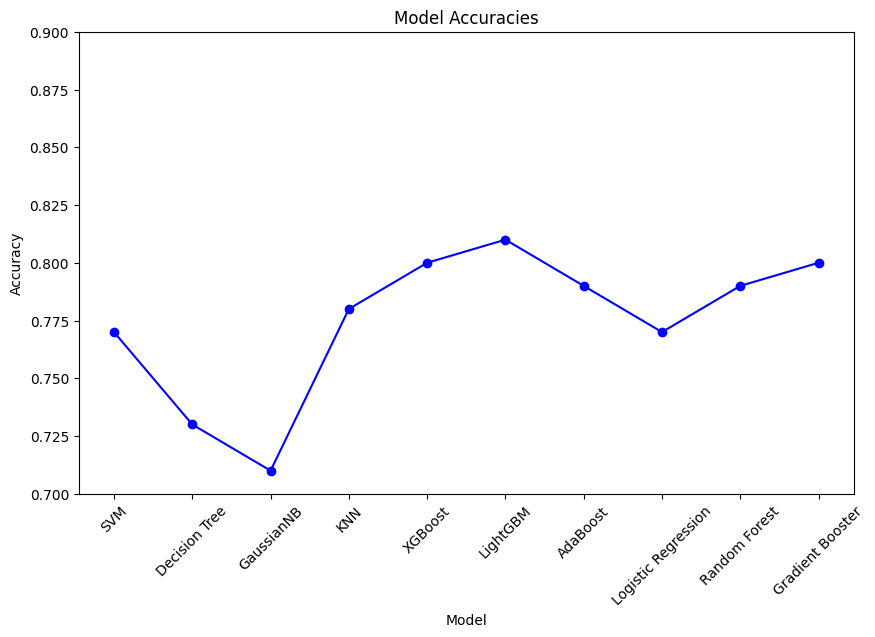

In [71]:
# Assume the following accuracies were calculated
accuracy_svm = 0.77
accuracy_dt = 0.73
accuracy_gnb = 0.71
accuracy_knn = 0.78
accuracy_xgb = 0.80
accuracy_lgbm = 0.81
accuracy_ab = 0.79
accuracy_lr = 0.77
accuracy_rf = 0.79
accuracy_gb =  0.80

# Model names and their corresponding accuracies
models = ['SVM', 'Decision Tree', 'GaussianNB', 'KNN', 'XGBoost', 'LightGBM', 'AdaBoost', 'Logistic Regression', 'Random Forest', 'Gradient Booster']
accuracies = [accuracy_svm, accuracy_dt, accuracy_gnb, accuracy_knn, accuracy_xgb, accuracy_lgbm, accuracy_ab, accuracy_lr, accuracy_rf, accuracy_gb]

# Plotting the accuracies as a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the plot
plt.show()

# Analysis & XAI

In [72]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.2 MB/s eta 0:00:00


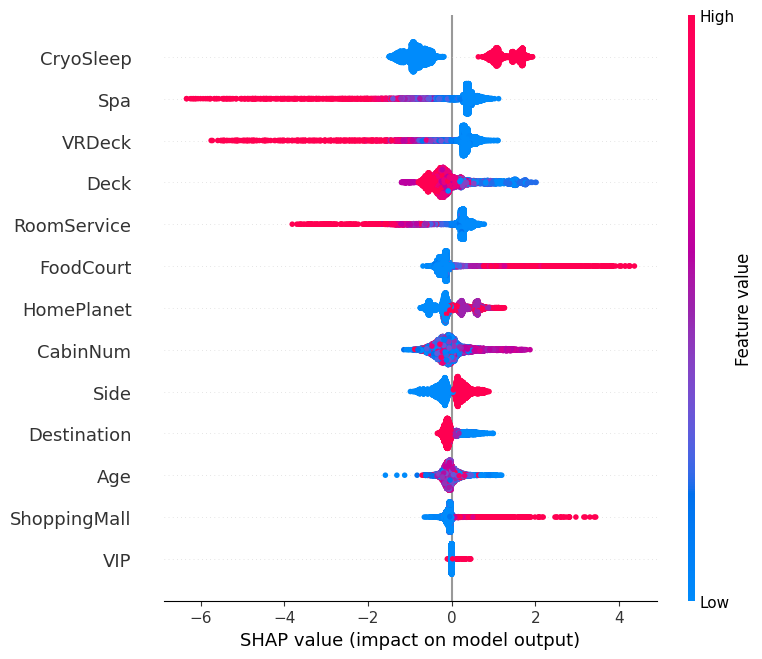

In [73]:
import shap

# Compute SHAP values
explainer = shap.TreeExplainer(lgbm_classifier)
shap_values = explainer.shap_values(X_train)

# Plot SHAP values
shap.summary_plot(shap_values, X_train)

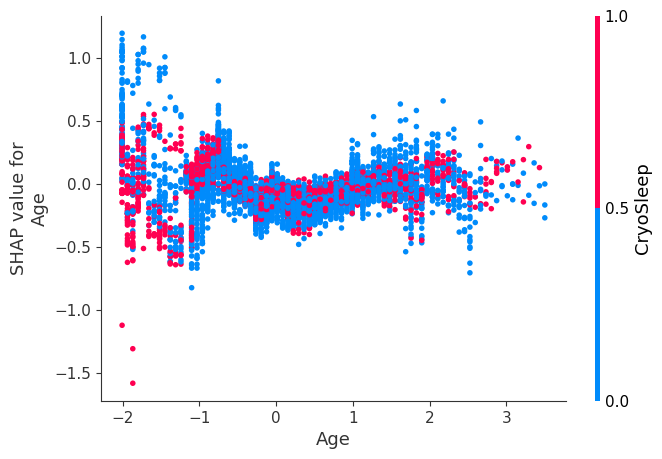

In [74]:
# Use actual feature names from the SHAP summary plot
correct_feature = 'Age'
interaction_feature = 'CryoSleep'

shap.dependence_plot(correct_feature, shap_values, X_train, interaction_index=interaction_feature)

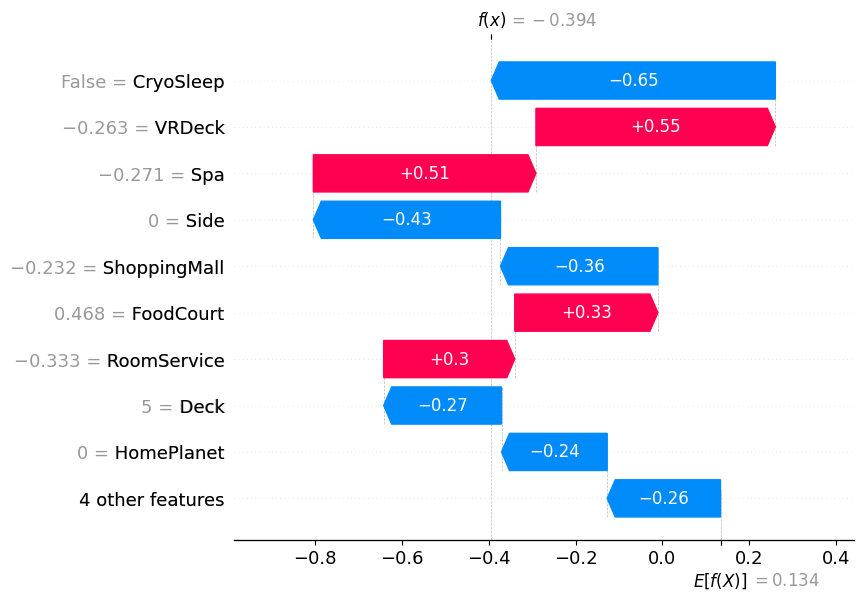

In [75]:
# Shapely waterfall plot
index_of_instance = 1
shap_values = explainer(X_train.iloc[index_of_instance:index_of_instance+1])

# Generate the waterfall plot for the specified instance
shap.plots.waterfall(shap_values[0])

# Auto ML

In [76]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375577 sha256=4fdd0bb7b1fe89352c8a7bda9bb1f694cb00fef27e6f8d1f615b3b90bd21d091
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [77]:
# Install h2o (only need to do this once)
!pip install h2o

# Import relevant packages
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps6c79_kw
  JVM stdout: /tmp/tmps6c79_kw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps6c79_kw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_0ms1r2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [78]:
# Split the data into features and target
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

# Convert to H2O frame
h2o_df = h2o.H2OFrame(pd.concat([X, y], axis=1))

# Split into training and testing sets
train, test = h2o_df.split_frame(ratios=[.8], seed=42)

# Set the response column
response = 'Transported'
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


AutoML progress: |
22:29:02.269: _train param, Dropping bad and constant columns: [PassengerId, Name]

██
22:29:32.337: _train param, Dropping bad and constant columns: [PassengerId, Name]

██
22:29:41.64: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:30:10.85: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:30:26.725: _train param, Dropping bad and constant columns: [PassengerId, Name]

██
22:30:50.114: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:31:00.95: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:31:08.954: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:31:17.826: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:31:23.739: _train param, Dropping bad and constant columns: [PassengerId, Name]

██
22:31:38.66: _train param, Dropping bad and constant columns: [PassengerId, Name]

█
22:31:46.326: _train param, Droppin

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240715_222901,0.999638,0.152369,0.999645,0.00990487,0.183256,0.0335826,1894,0.060304,DRF
XGBoost_grid_1_AutoML_1_20240715_222901_model_1,0.997907,0.121385,0.99789,0.0218299,0.168502,0.0283928,1385,0.009185,XGBoost
XRT_1_AutoML_1_20240715_222901,0.991954,0.217245,0.99195,0.0506711,0.237432,0.0563741,1911,0.072229,DRF
XGBoost_grid_1_AutoML_1_20240715_222901_model_2,0.986195,0.193565,0.985843,0.0630779,0.232782,0.0541876,1090,0.008313,XGBoost
XGBoost_grid_1_AutoML_1_20240715_222901_model_3,0.983262,0.207122,0.983257,0.0708854,0.242999,0.0590487,1353,0.01128,XGBoost
GBM_4_AutoML_1_20240715_222901,0.974674,0.250327,0.975611,0.0945668,0.268789,0.0722475,976,0.021865,GBM
GBM_grid_1_AutoML_1_20240715_222901_model_2,0.971564,0.256924,0.973133,0.095555,0.273088,0.074577,2090,0.017642,GBM
XGBoost_2_AutoML_1_20240715_222901,0.96222,0.266968,0.964086,0.112485,0.284792,0.0811064,2654,0.014915,XGBoost
GBM_3_AutoML_1_20240715_222901,0.961577,0.281844,0.963977,0.115013,0.291102,0.0847401,921,0.063869,GBM
StackedEnsemble_AllModels_1_AutoML_1_20240715_222901,0.952974,0.293794,0.956026,0.126006,0.302085,0.0912555,14581,0.078841,StackedEnsemble


# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

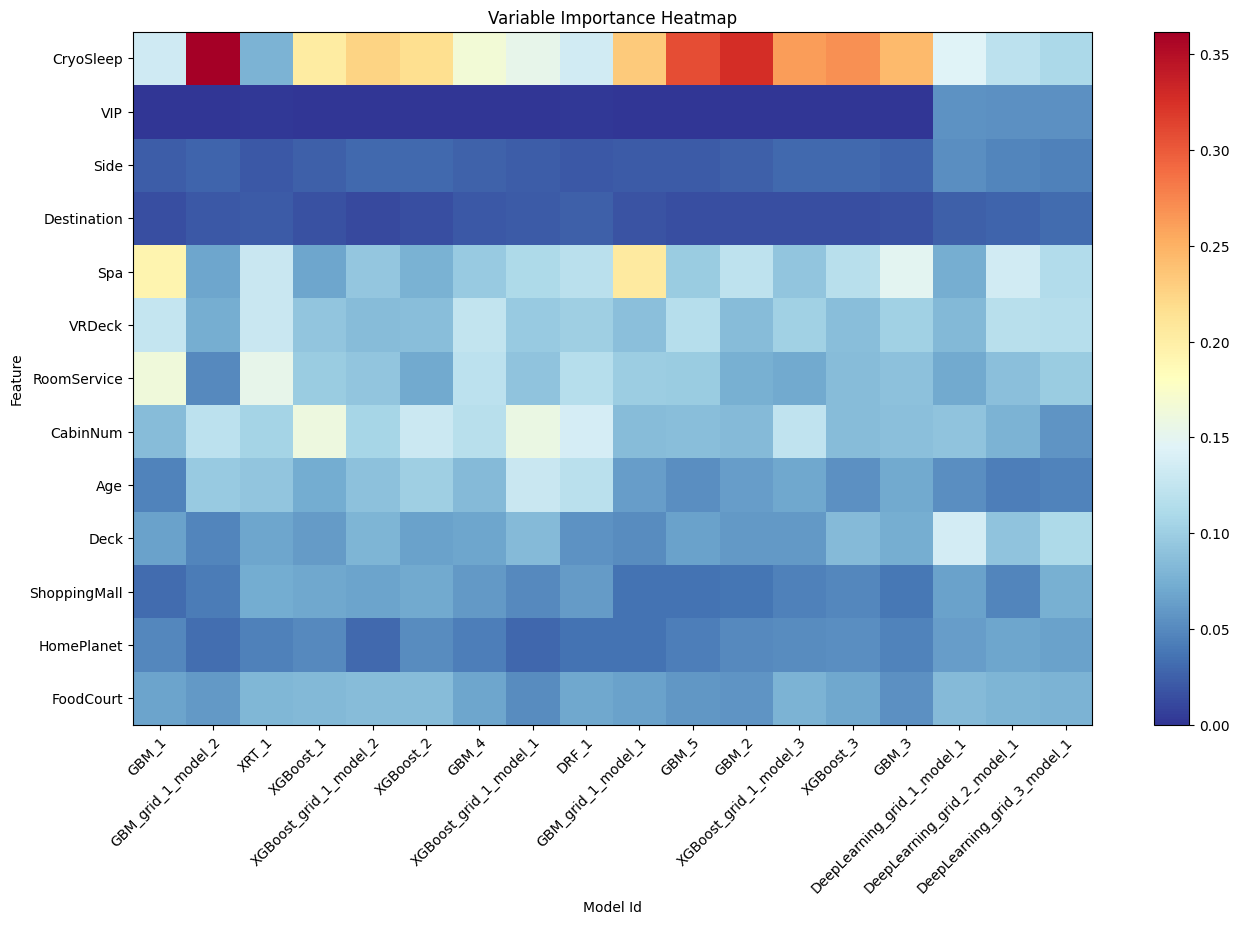

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

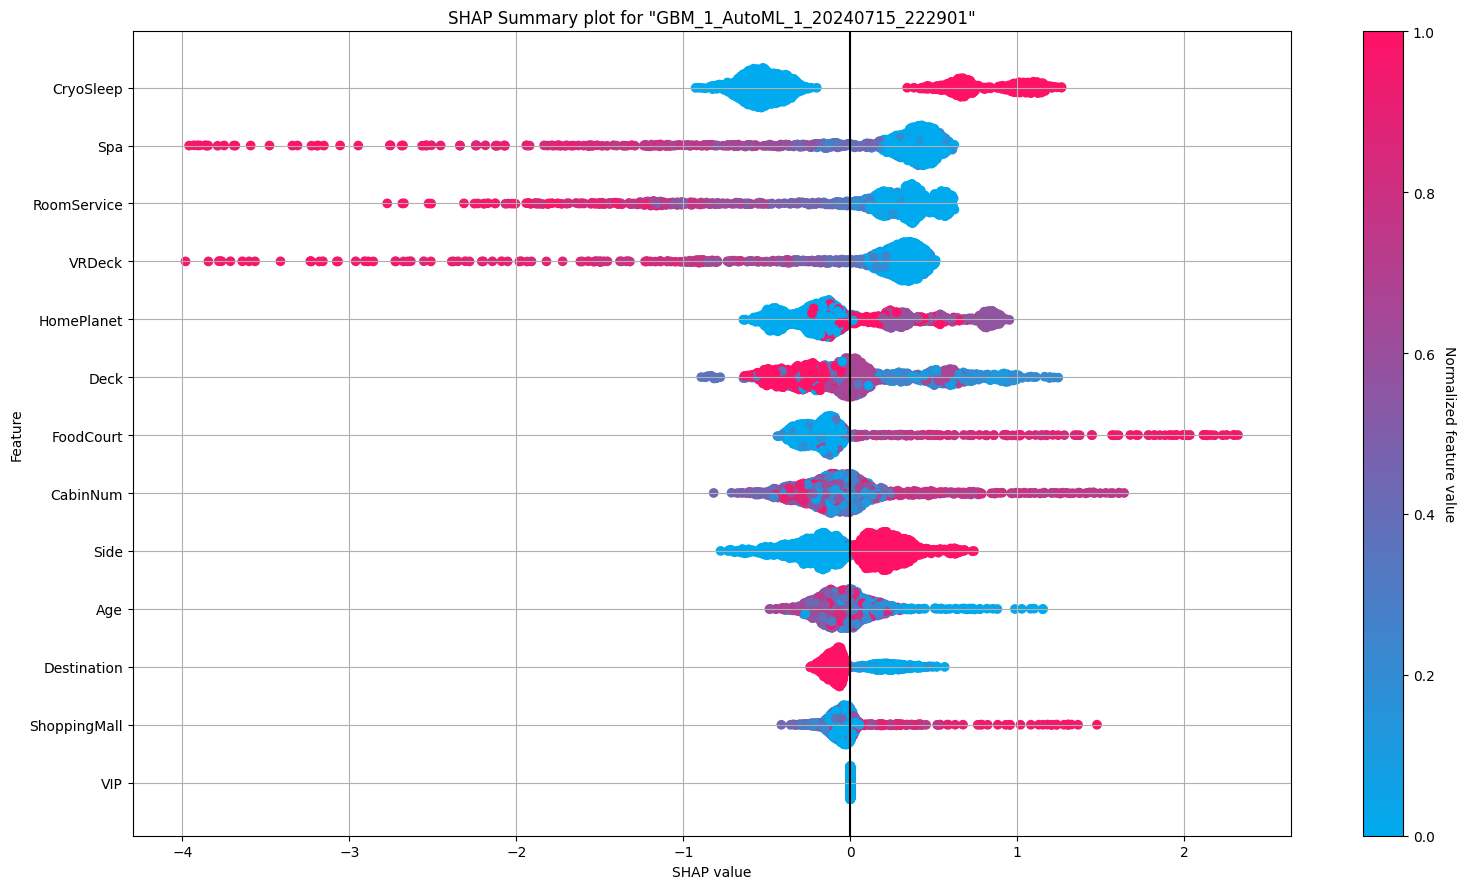

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

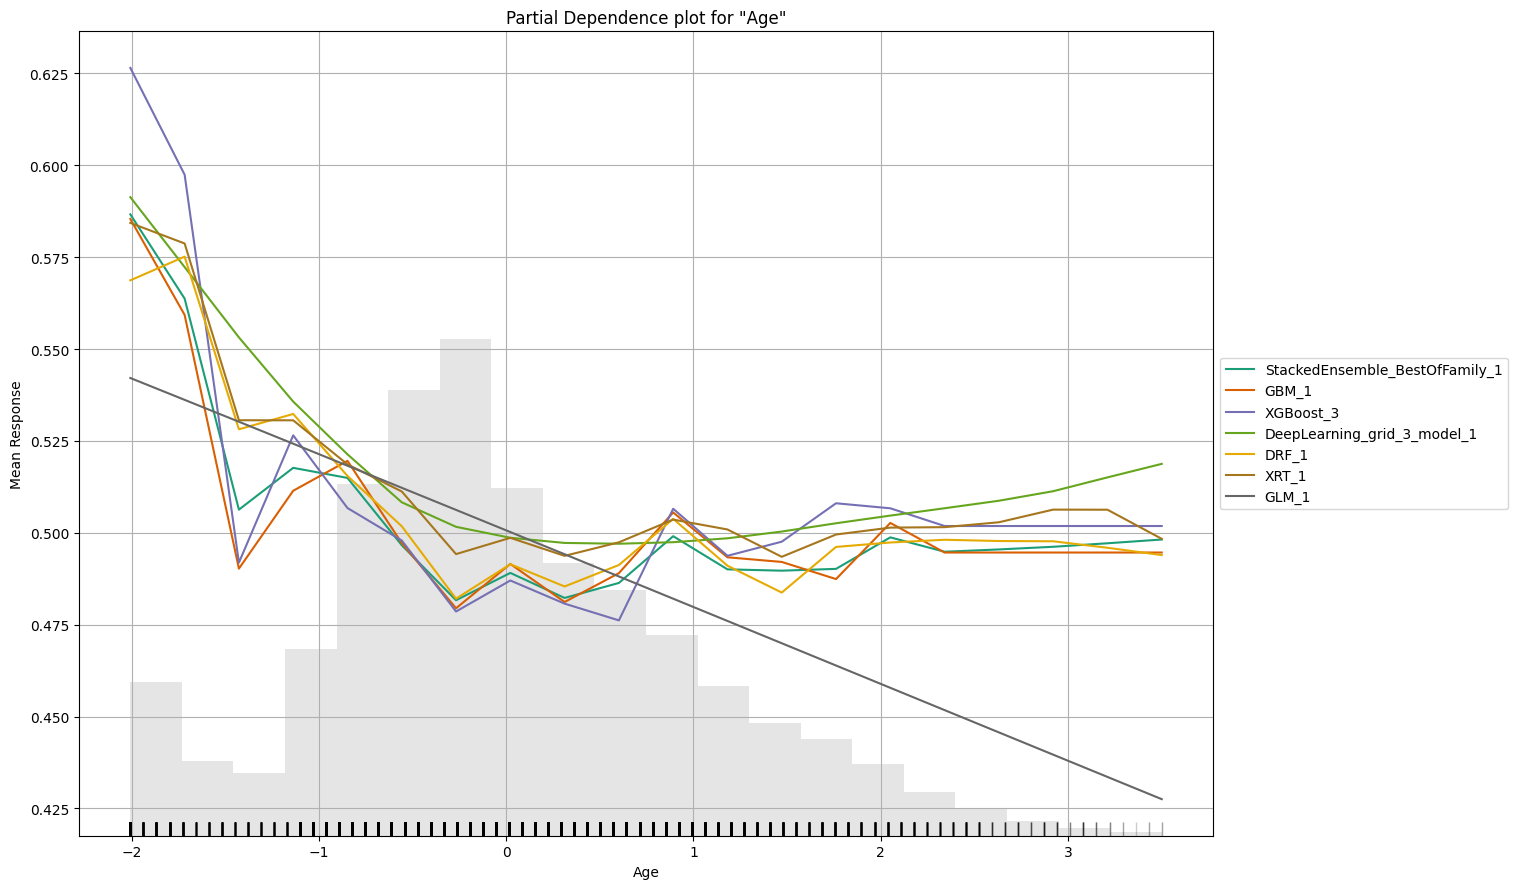

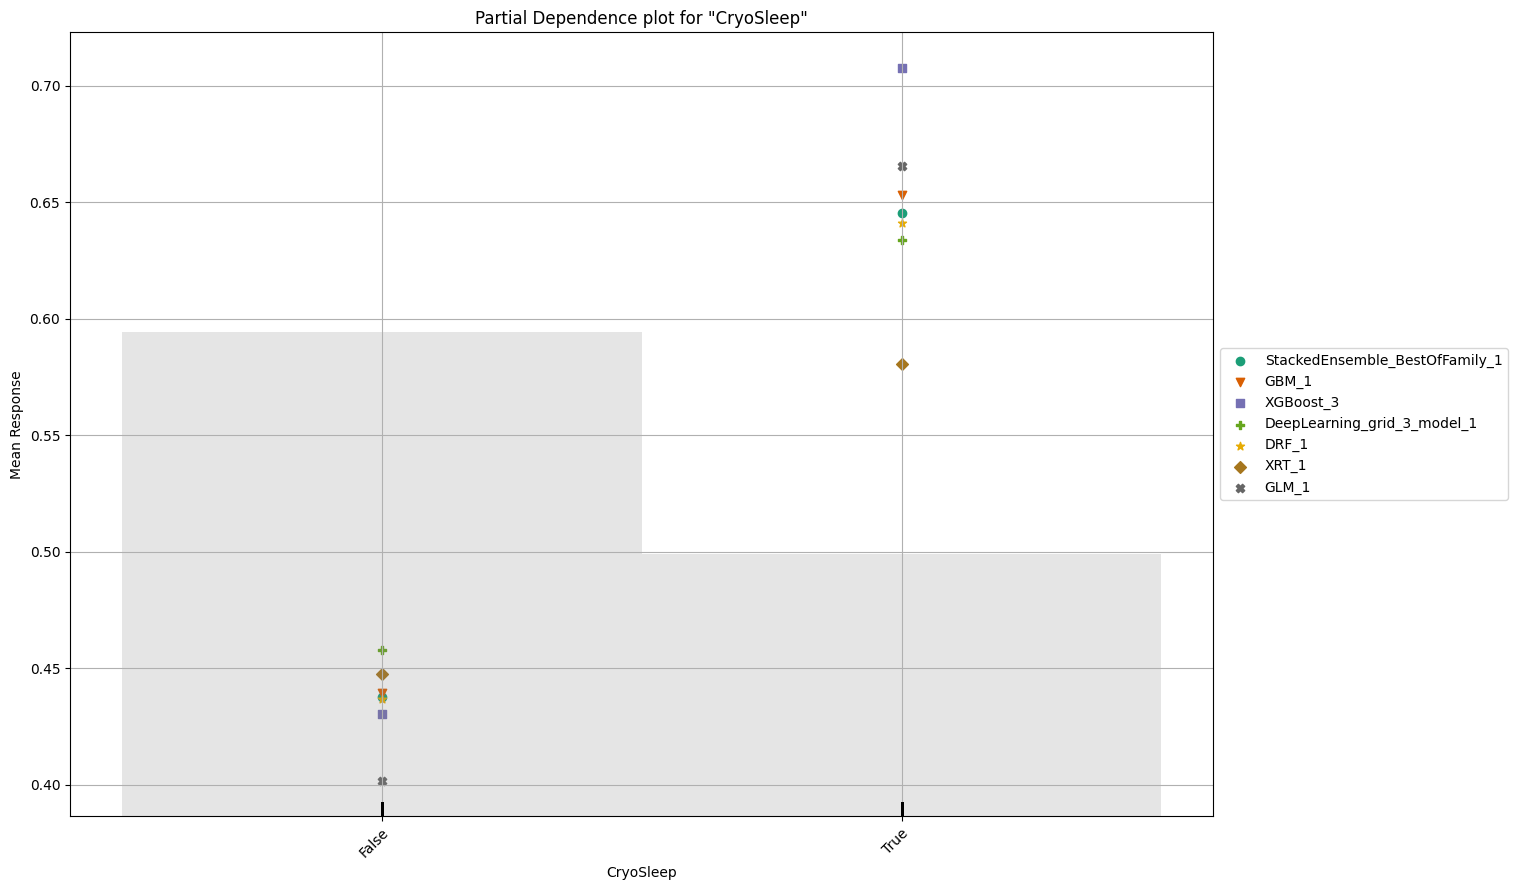

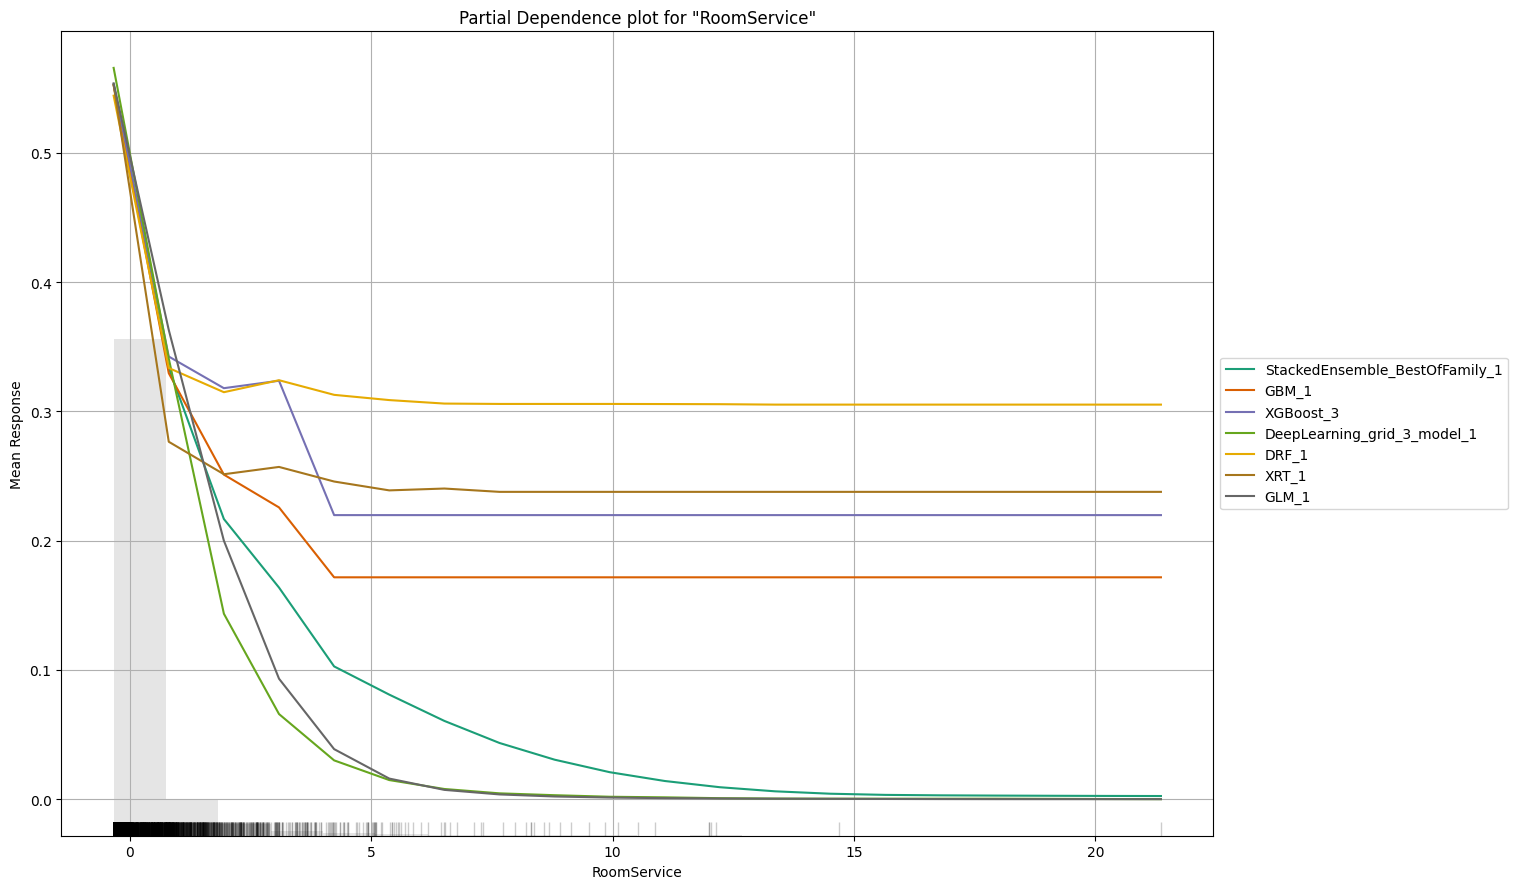

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240715_222901,0.999638,0.152369,0.999645,0.00990487,0.183256,0.0335826,1894,0.060304,DRF
XGBoost_grid_1_AutoML_1_20240715_222901_model_1,0.997907,0.121385,0.99789,0.0218299,0.168502,0.0283928,1385,0.009185,XGBoost
XRT_1_AutoML_1_20240715_222901,0.991954,0.217245,0.99195,0.0506711,0.237432,0.0563741,1911,0.072229,DRF
XGBoost_grid_1_AutoML_1_20240715_222901_model_2,0.986195,0.193565,0.985843,0.0630779,0.232782,0.0541876,1090,0.008313,XGBoost
XGBoost_grid_1_AutoML_1_20240715_222901_model_3,0.983262,0.207122,0.983257,0.0708854,0.242999,0.0590487,1353,0.01128,XGBoost
GBM_4_AutoML_1_20240715_222901,0.974674,0.250327,0.975611,0.0945668,0.268789,0.0722475,976,0.021865,GBM
GBM_grid_1_AutoML_1_20240715_222901_model_2,0.971564,0.256924,0.973133,0.095555,0.273088,0.074577,2090,0.017642,GBM
XGBoost_2_AutoML_1_20240715_222901,0.96222,0.266968,0.964086,0.112485,0.284792,0.0811064,2654,0.014915,XGBoost
GBM_3_AutoML_1_20240715_222901,0.961577,0.281844,0.963977,0.115013,0.291102,0.0847401,921,0.063869,GBM
StackedEnsemble_AllModels_1_AutoML_1_20240715_222901,0.952974,0.293794,0.956026,0.126006,0.302085,0.0912555,14581,0.078841,StackedEnsemble


# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

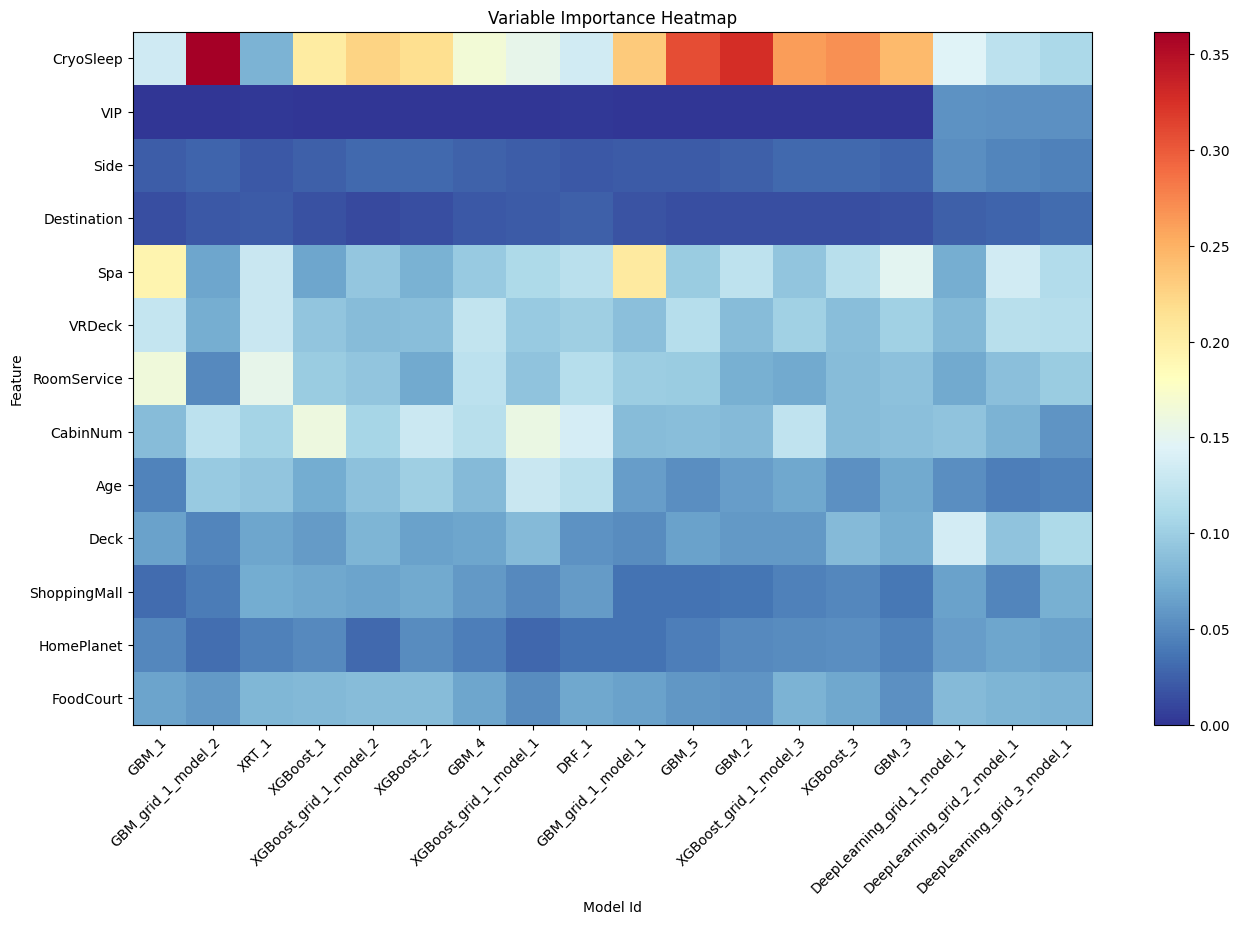

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

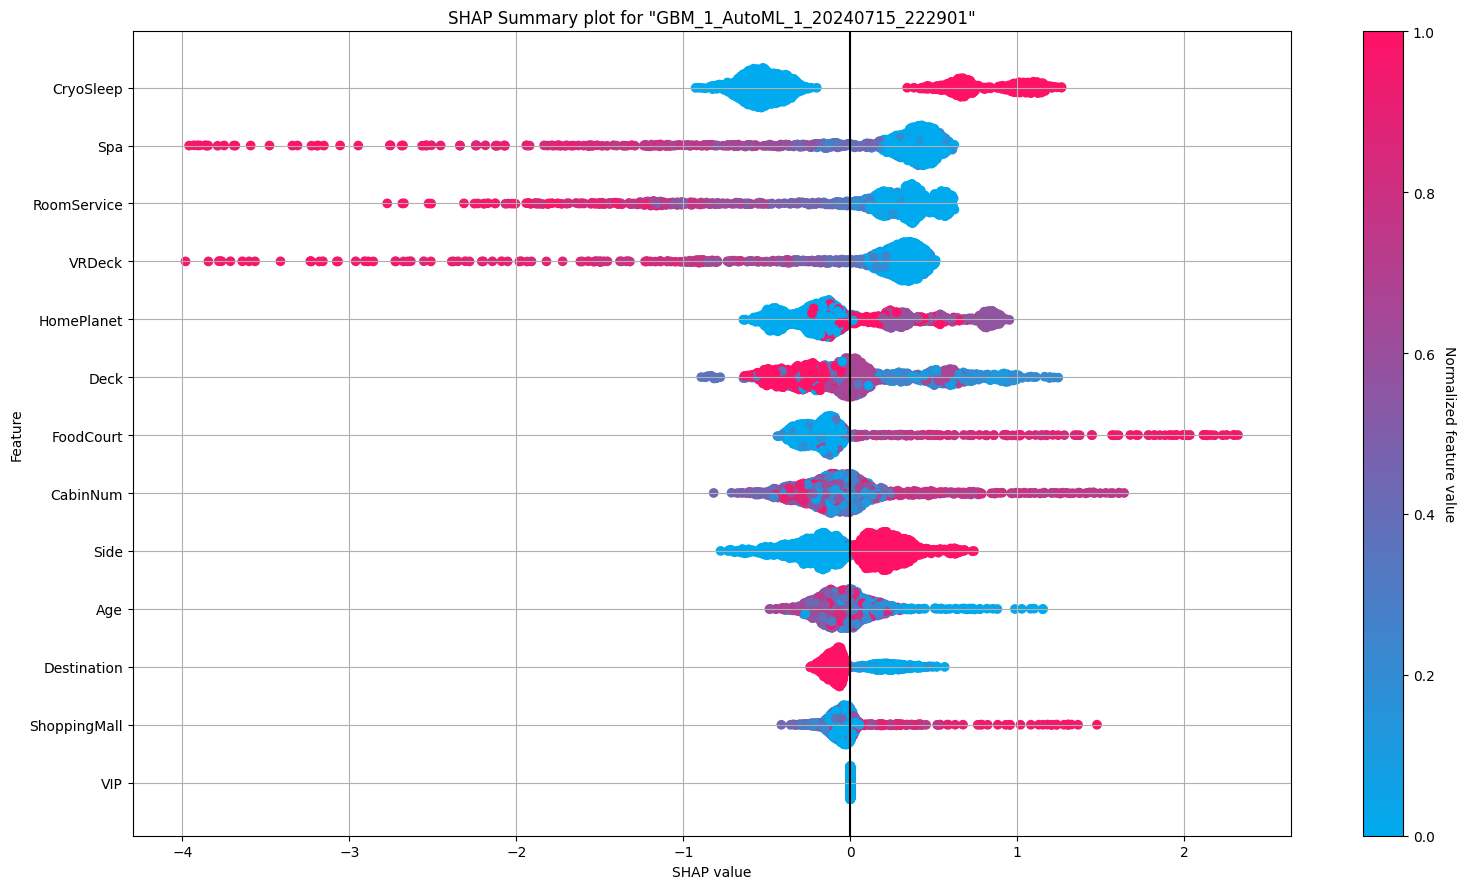

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

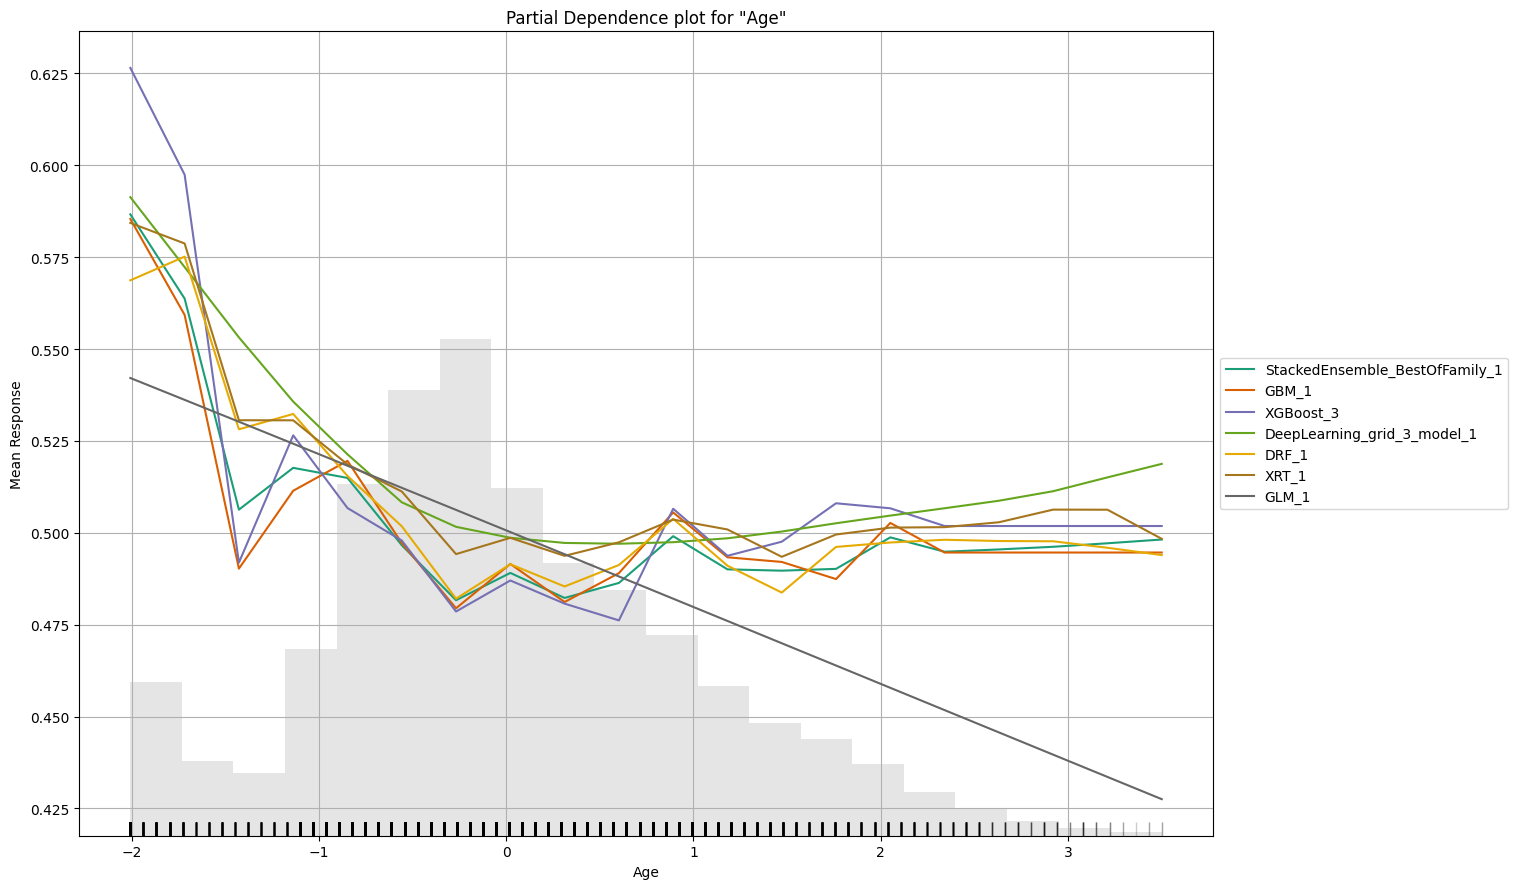

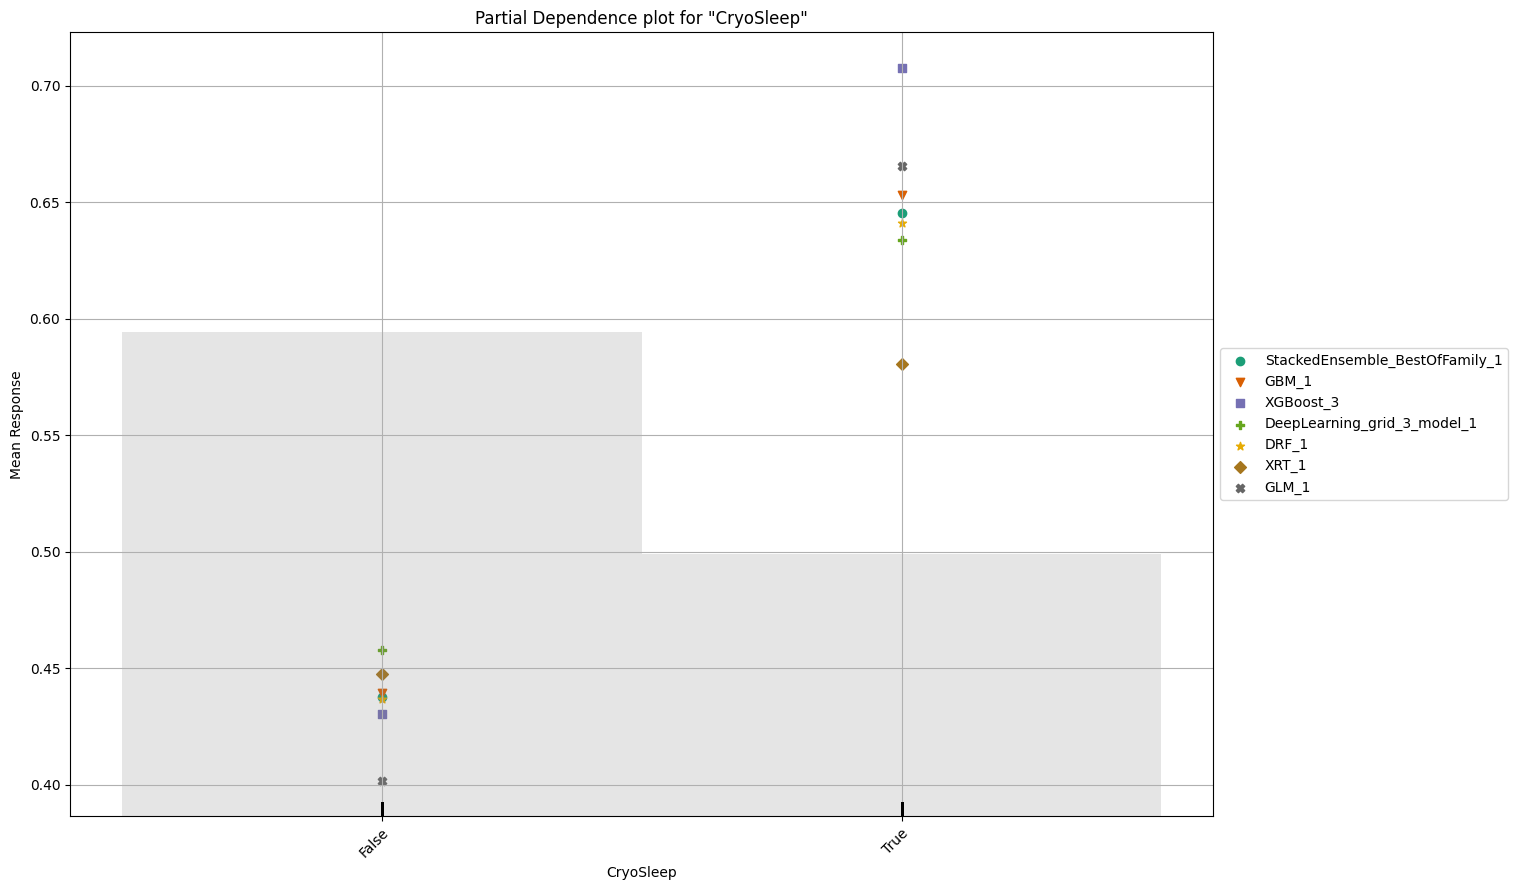

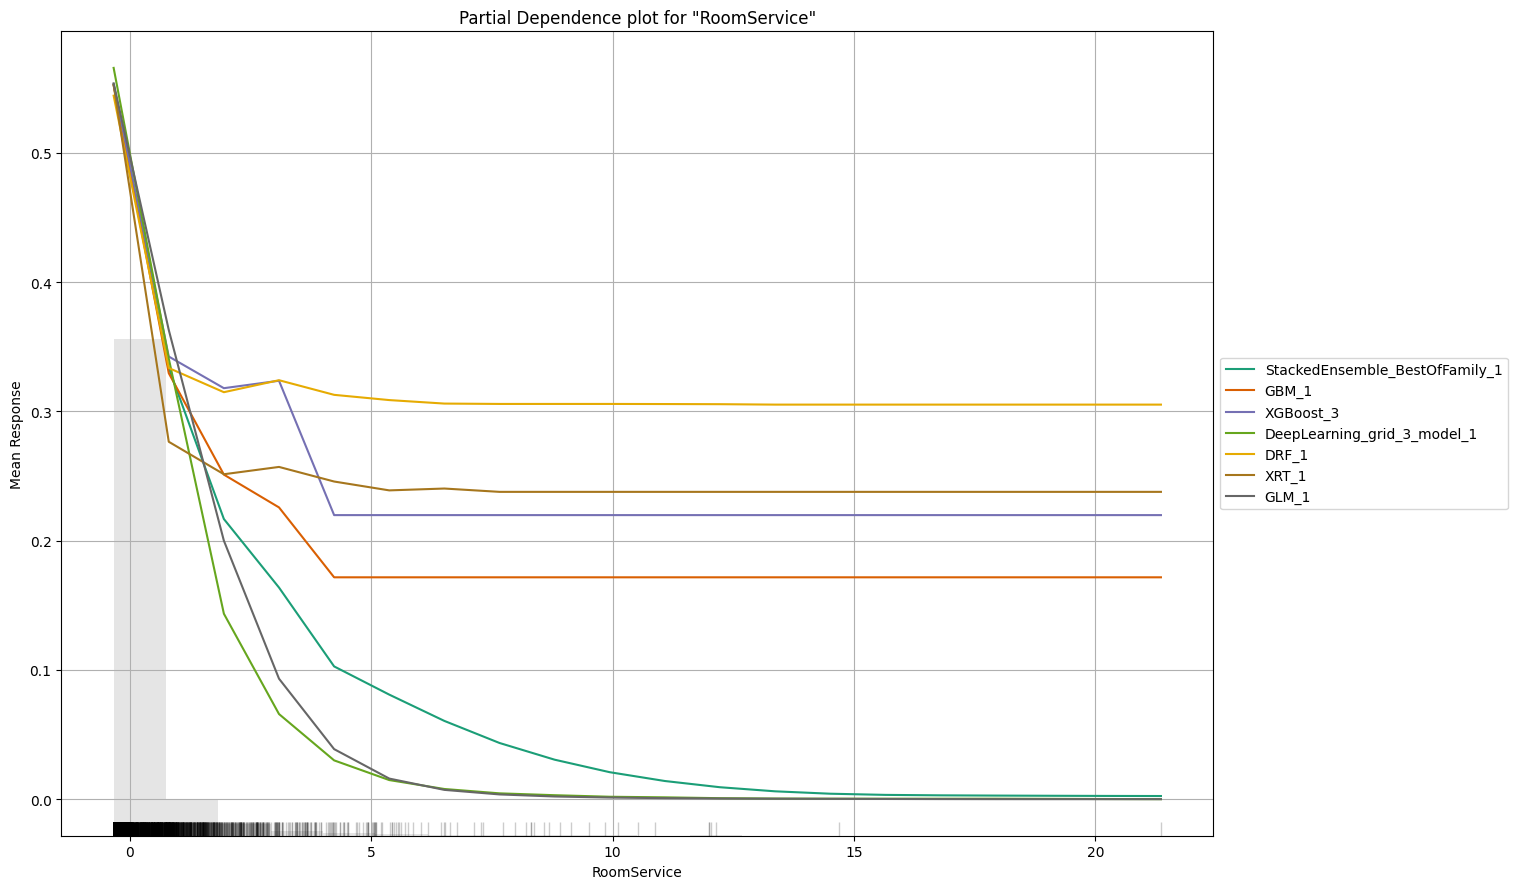

In [79]:
# Initialize H2O AutoML with a maximum number of models
aml = H2OAutoML(max_models=20, seed=42)

# Train the AutoML model
aml.train(y=response, training_frame=train)

# View the leaderboard
lb = aml.leaderboard
print(lb)

# Make predictions on the test set
preds = aml.leader.predict(test)
print(preds)

# Generate explanations
aml.explain(train, include_explanations=["leaderboard", "varimp_heatmap", "pdp", "ice", "shap_summary"], columns=["Age", "CryoSleep", "RoomService"])

## Data Predictions

In [80]:
# Predict on the test set
y_test_pred = lgbm_classifier.predict(X_test)

# Add the predictions to the test dataframe
df_test['Transported'] = y_test_pred


# Show a few rows of the resulting dataframe
df_test[['PassengerId', 'Transported']].head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [81]:
# Ensure 'Transported' column is not in the test set
if 'Transported' in df_test.columns:
    df_test = df_test.drop(['Transported'], axis=1)

# Drop unnecessary columns and prepare X_test
X_test = df_test.drop(['PassengerId', 'Name'], axis=1)

# Predict and add the 'Transported' column to the test set
df_test['Transported'] = grid_search.predict(X_test)

## Kaggle Submisson File

In [82]:
submission = df_test[['PassengerId', 'Transported']]
submission.to_csv('lbgm.submission.csv', index=False)